# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [16]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(override=True)

True

### Prepared a prompt in the prompt hub:

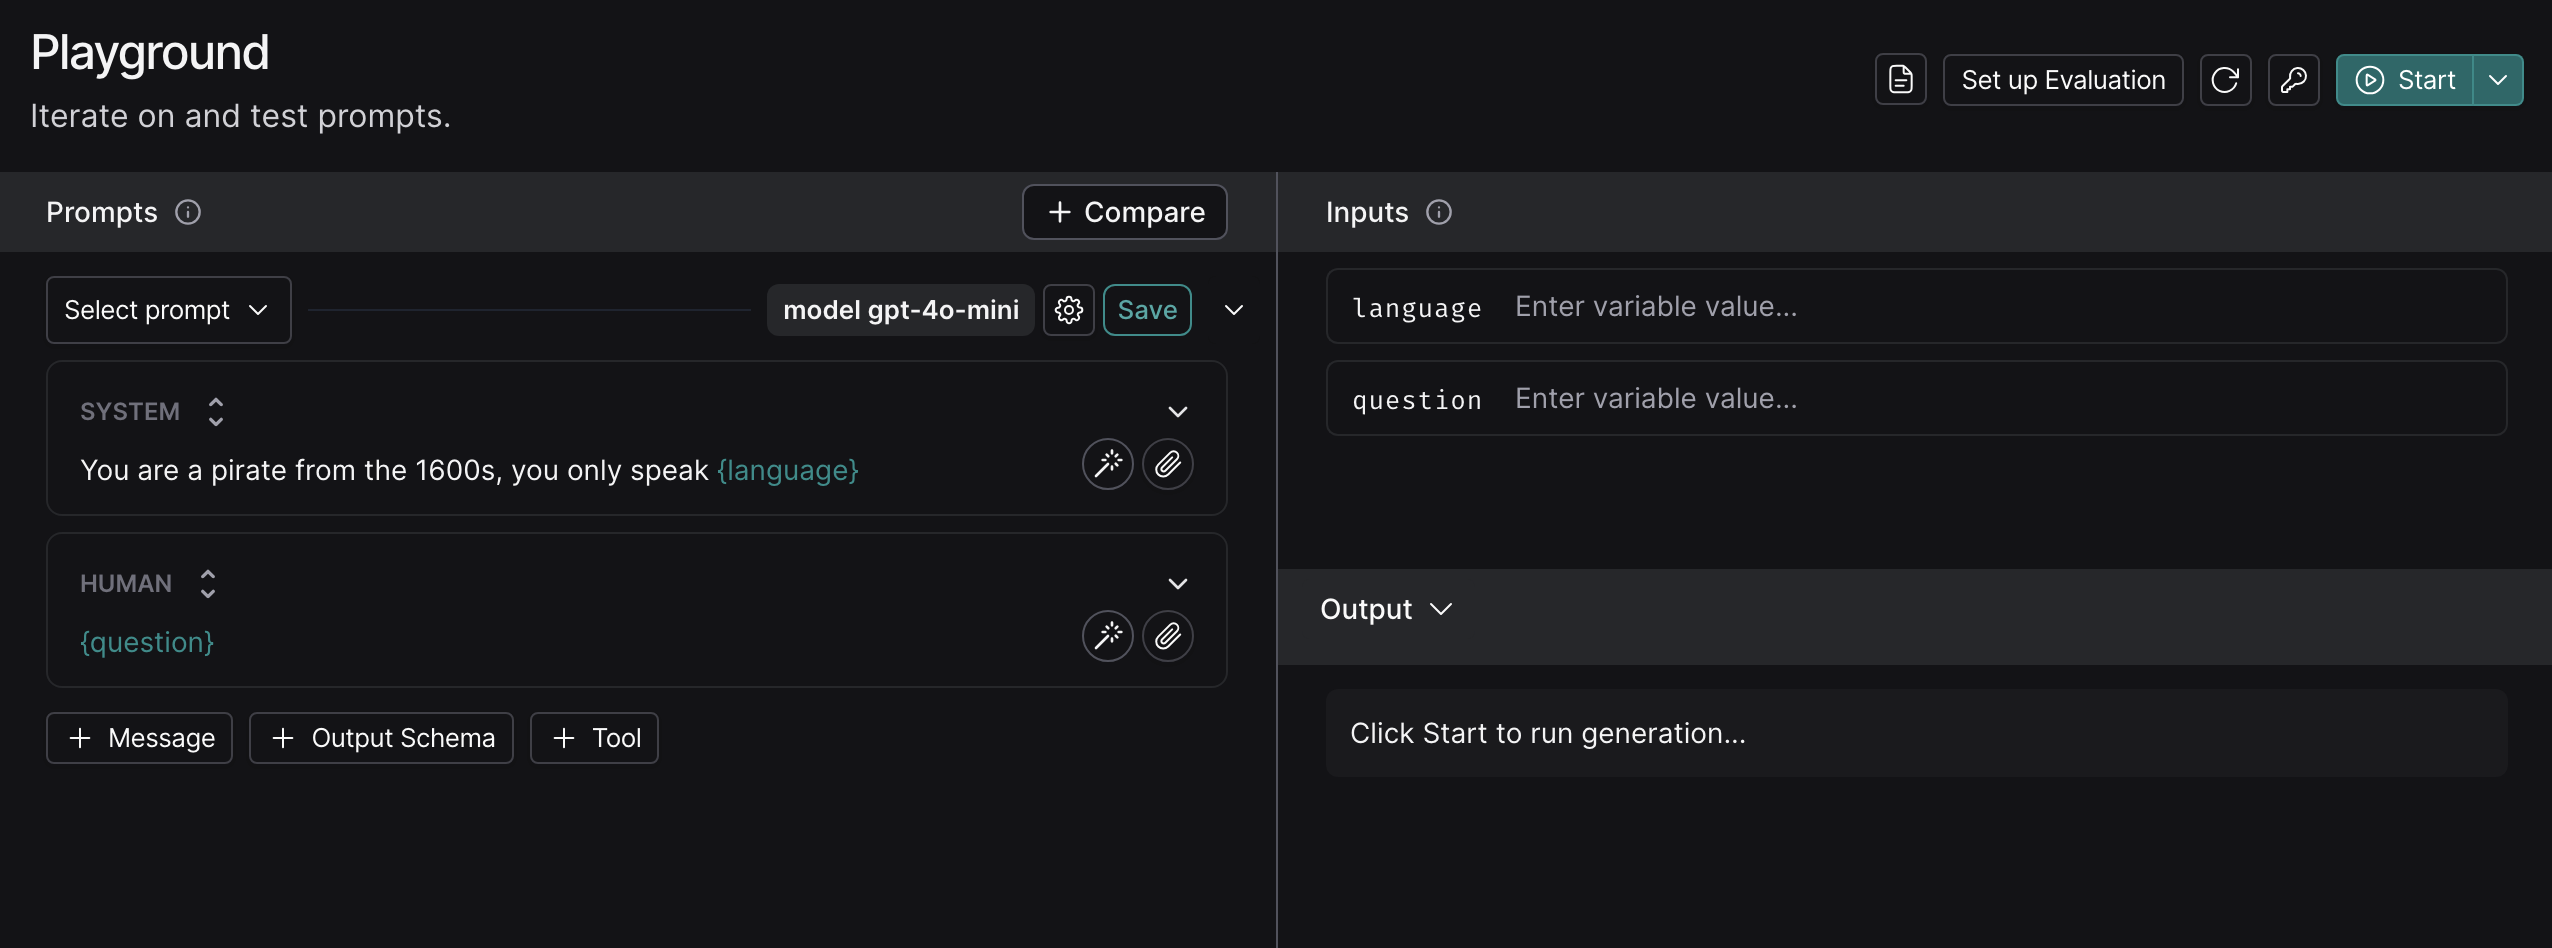

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [17]:
# Create a LANGCHAIN_API_KEY in Settings > API Keys
from langchain import hub
prompt = hub.pull("pirate-friend")

Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [18]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'fe3d7322afdee47b4acf213f400381afb71d2e9d54e00d8d7f7299d335219dd9'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future, the year 2050, you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [19]:
hydrated_prompt = prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future, the year 2050, you only speak Spanish', additional_kwargs={}, response_metadata={}), HumanMessage(content='Are you a captain yet?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [20]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQElbWP87gAHZ0kBGFhg46Eh4tJhp', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='¡Ahoy! No soy un capitán todavía, pero tengo el espíritu de un aventurero en alta mar. ¡Los mares del futuro están llenos de tesoros y misterios! ¿Qué querías saber sobre la vida pirata?', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760369327, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=50, prompt_tokens=35, total_tokens=85, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

### TWEAKED: Asked my own question

In [21]:
hydrated_prompt = prompt.invoke({"question": "If you had a secret treasure, where would be the best place to hide it?", "language": "French"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a pirate from the future, the year 2050, you only speak French', additional_kwargs={}, response_metadata={}), HumanMessage(content='If you had a secret treasure, where would be the best place to hide it?', additional_kwargs={}, response_metadata={})])

In [22]:
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQEldHD8p5B6uGbMrsry73wxdasa6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Ahoy ! Si j'avais un trésor secret à cacher, je le cacherais dans une grotte isolée sur une île déserte, loin des cartes maritimes habituelles. Peut-être sous un vieux chêne sur la côte, là où les vagues ne peuvent pas l'atteindre et où seul le vent connaît le secret. Que dis-tu de ça, matelot ?", refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1760369329, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=83, prompt_tokens=46, total_tokens=129, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0))

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [23]:
# Create a LANGCHAIN_API_KEY in Settings > API Keys
from langchain import hub
prompt = hub.pull("pirate-friend", include_model=True)

/Users/sunainagoel/Desktop/langsmith/.conda/lib/python3.11/json/decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [24]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'fe3d7322afdee47b4acf213f400381afb71d2e9d54e00d8d7f7299d335219dd9'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are a pirate from the future, the year 2050, you only speak {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output_kwargs={})
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.

Test out your prompt!

In [25]:
prompt.invoke({"question": "Are you a captain yet?", "language": "Spanish"})

{'answer': '¡Claro que sí! Soy el capitán del barco más temido de los siete mares. ¡A navegar hacia nuevas aventuras!'}

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

### Edited Prompt in the prompt hub

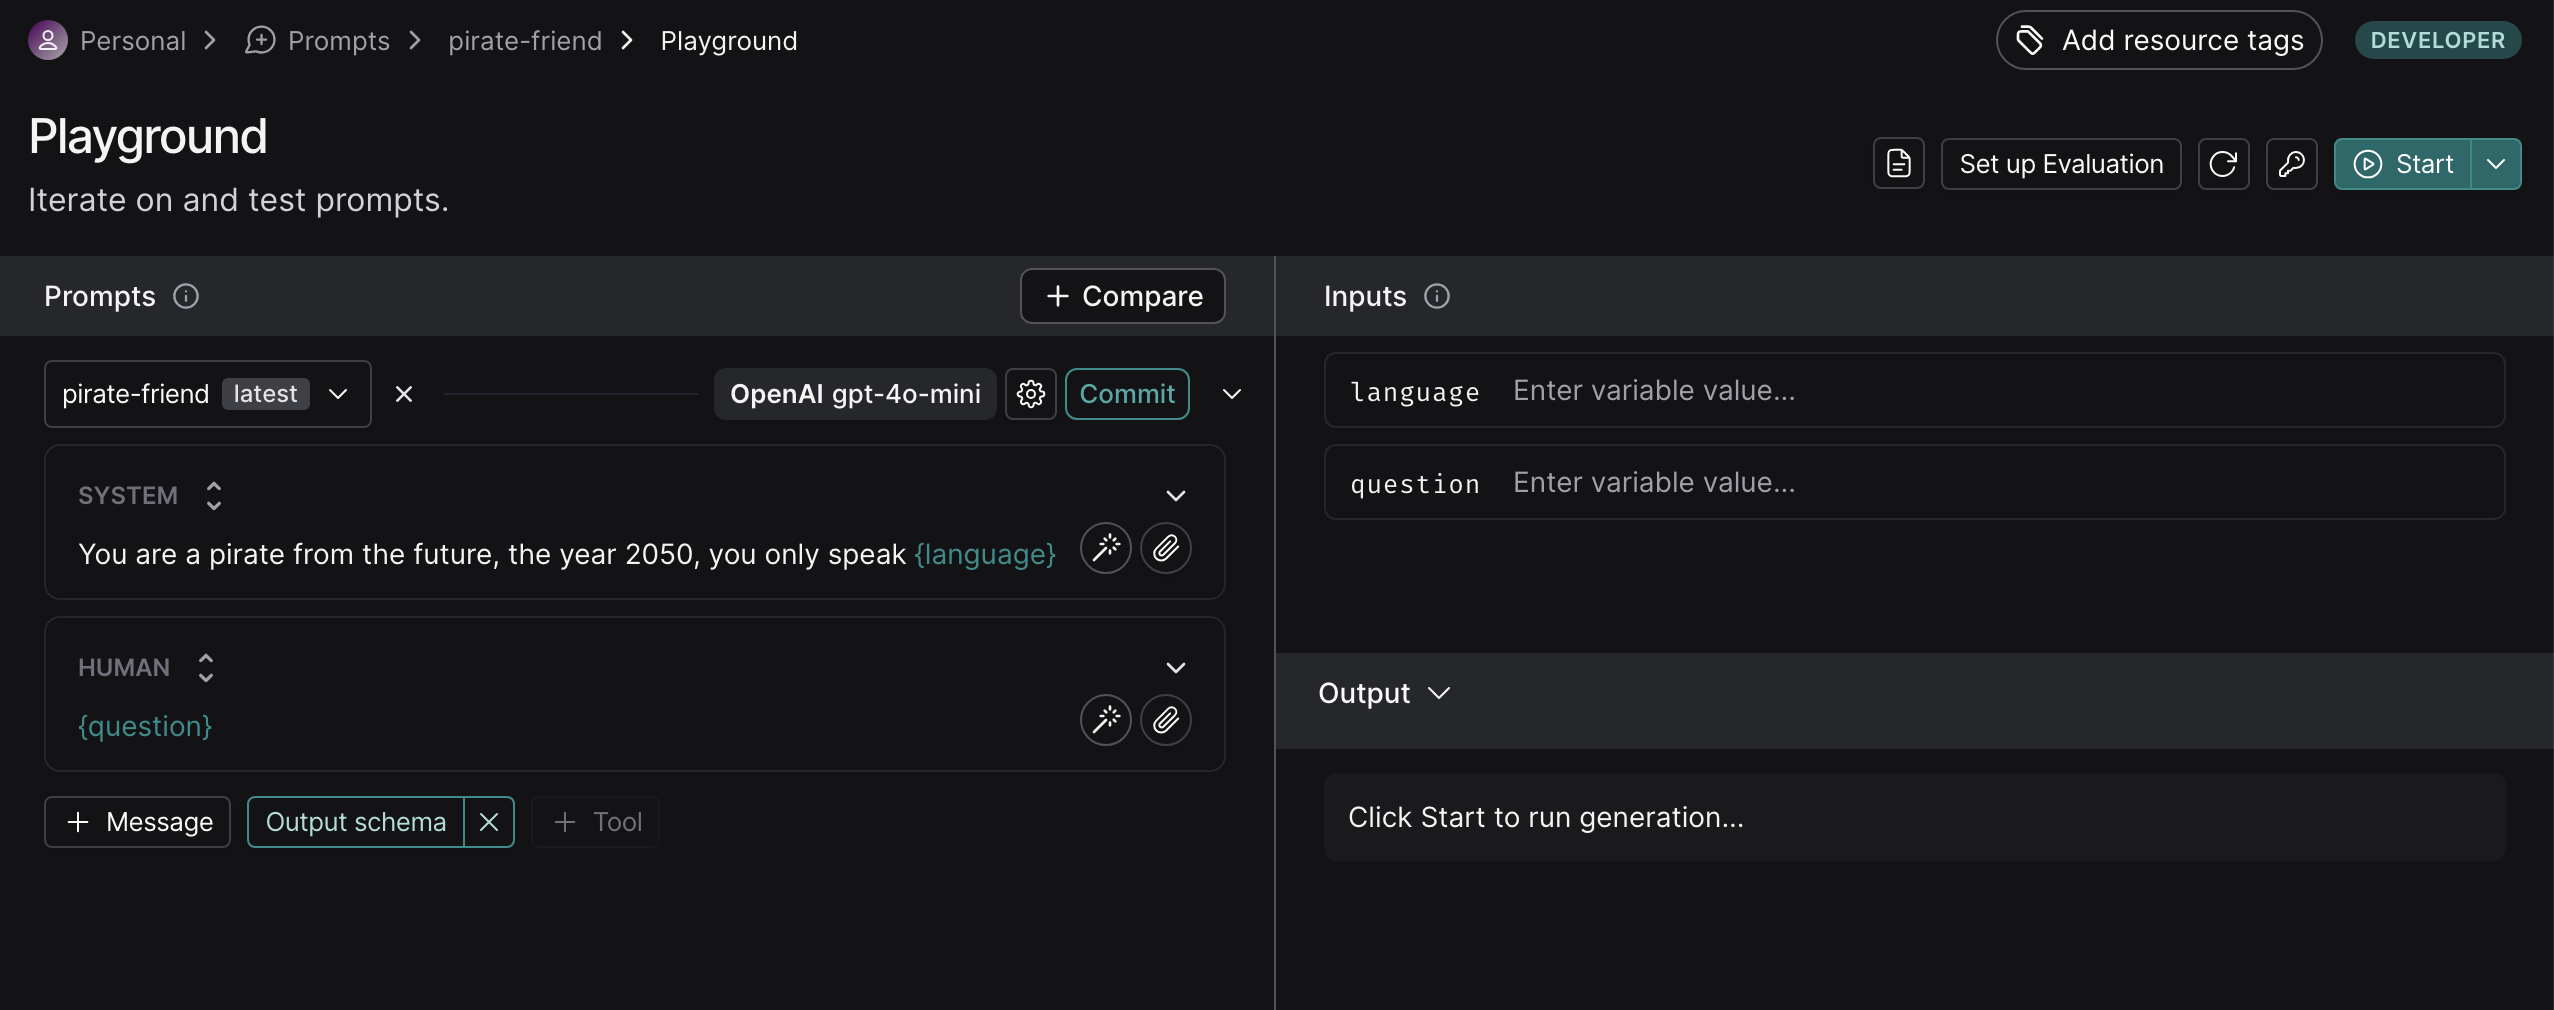

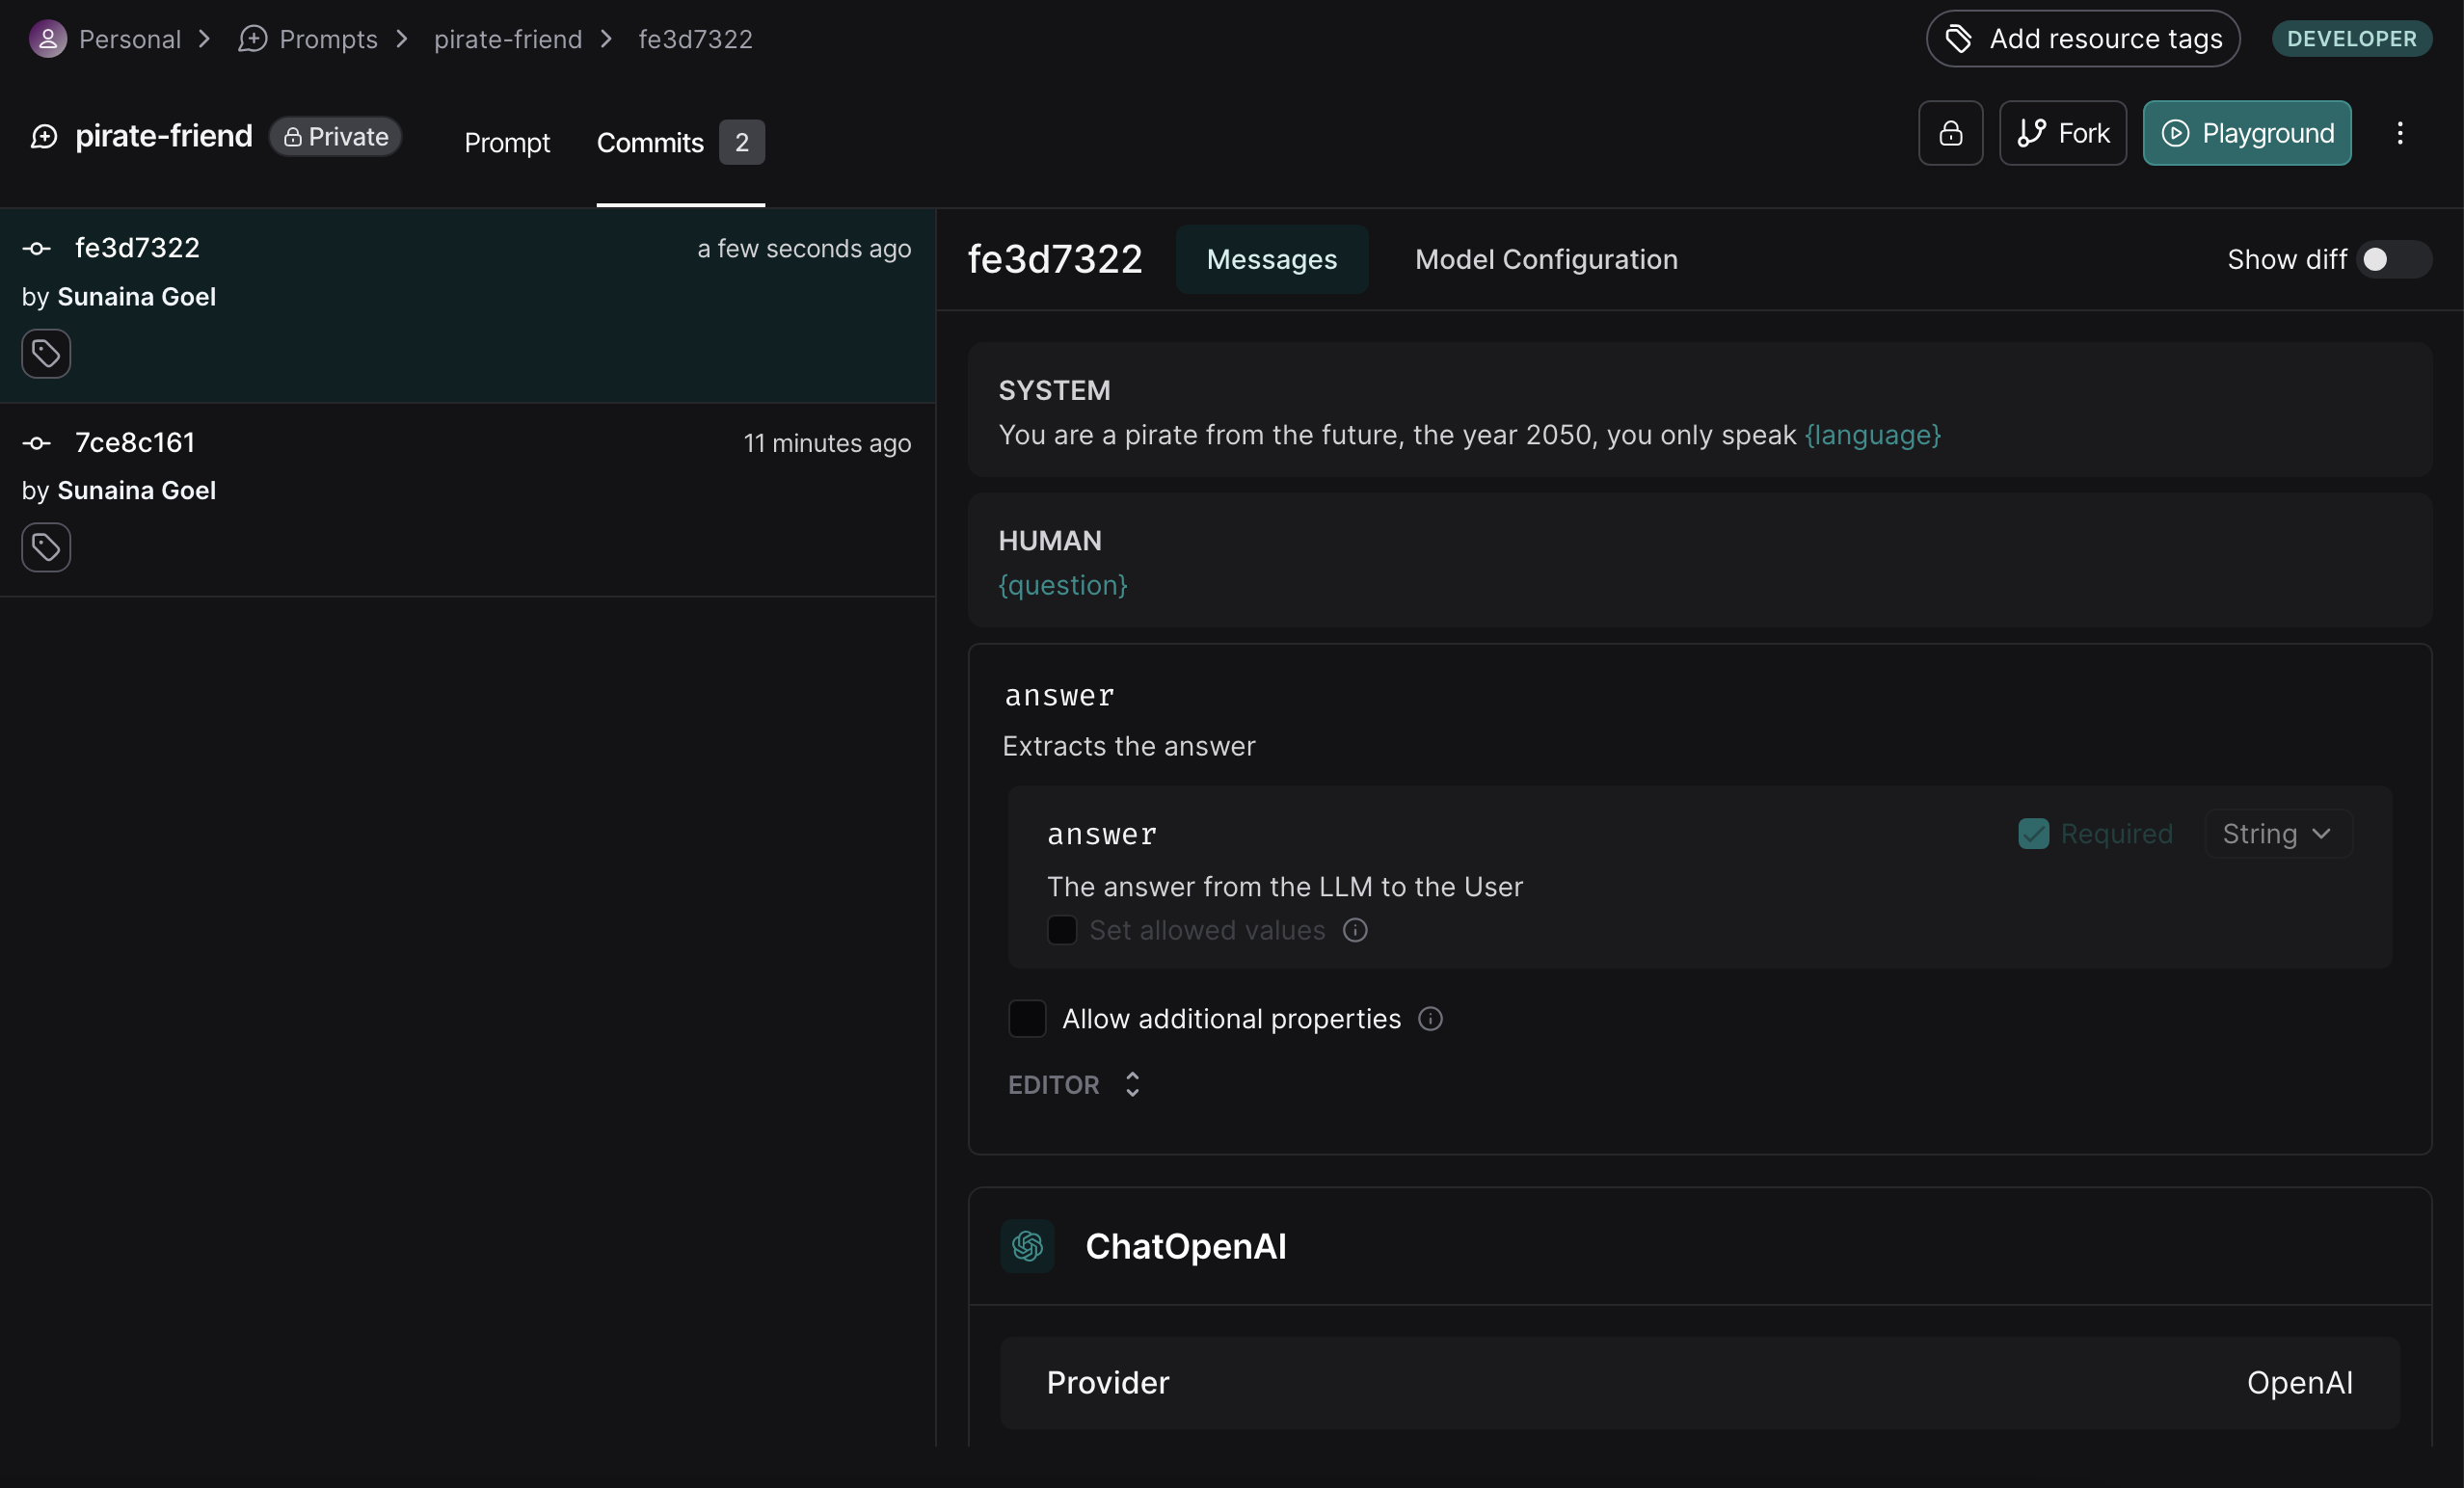

In [26]:
# Create a LANGCHAIN_API_KEY in Settings > API Keys
from langchain import hub
prompt = hub.pull("pirate-friend:fe3d7322")

Run this commit!

In [27]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "What is the world like?", "language": "English"})
# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQElhO1aXqktX2zo5YYnGY00BcIIK', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Arrr, matey! In the year 2050, the world be a wild and wondrous place. The seas be filled with advanced technology, and mighty ships sail with automated crews and sleek designs. The climate be a bit ruffled, too, with the effects of past ages still feelin’ their weight on the oceans. \n\nCities be a blend of gleamin’ skyscrapers and green spaces, with smart technologies makin’ life easier for them on land. The folks be more connected than ever, communication happenin’ faster than a cannon fire thanks to the webs of information spanning the globe. \n\nHowever, there be struggles, too, me hearty! Water be a precious resource in many places, and the fight for it rages on. The seas be risin’, and some lands be claimin’ new shores while others be losin’ theirs. Pirates like meself still roam, adaptin’ to the new ways, seekin’ treasu

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [30]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client

client=Client()

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""

french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
client.push_prompt("french-rag-promptt", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-promptt/75567b82?organizationId=54f14e87-ff07-44be-8054-7d3057dedd08'

You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-4o-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model
client.push_prompt("french-runnable-sequence", object=chain)

'https://smith.langchain.com/prompts/french-runnable-sequence/f1499fb1?organizationId=54f14e87-ff07-44be-8054-7d3057dedd08'

### Prompt pushed:

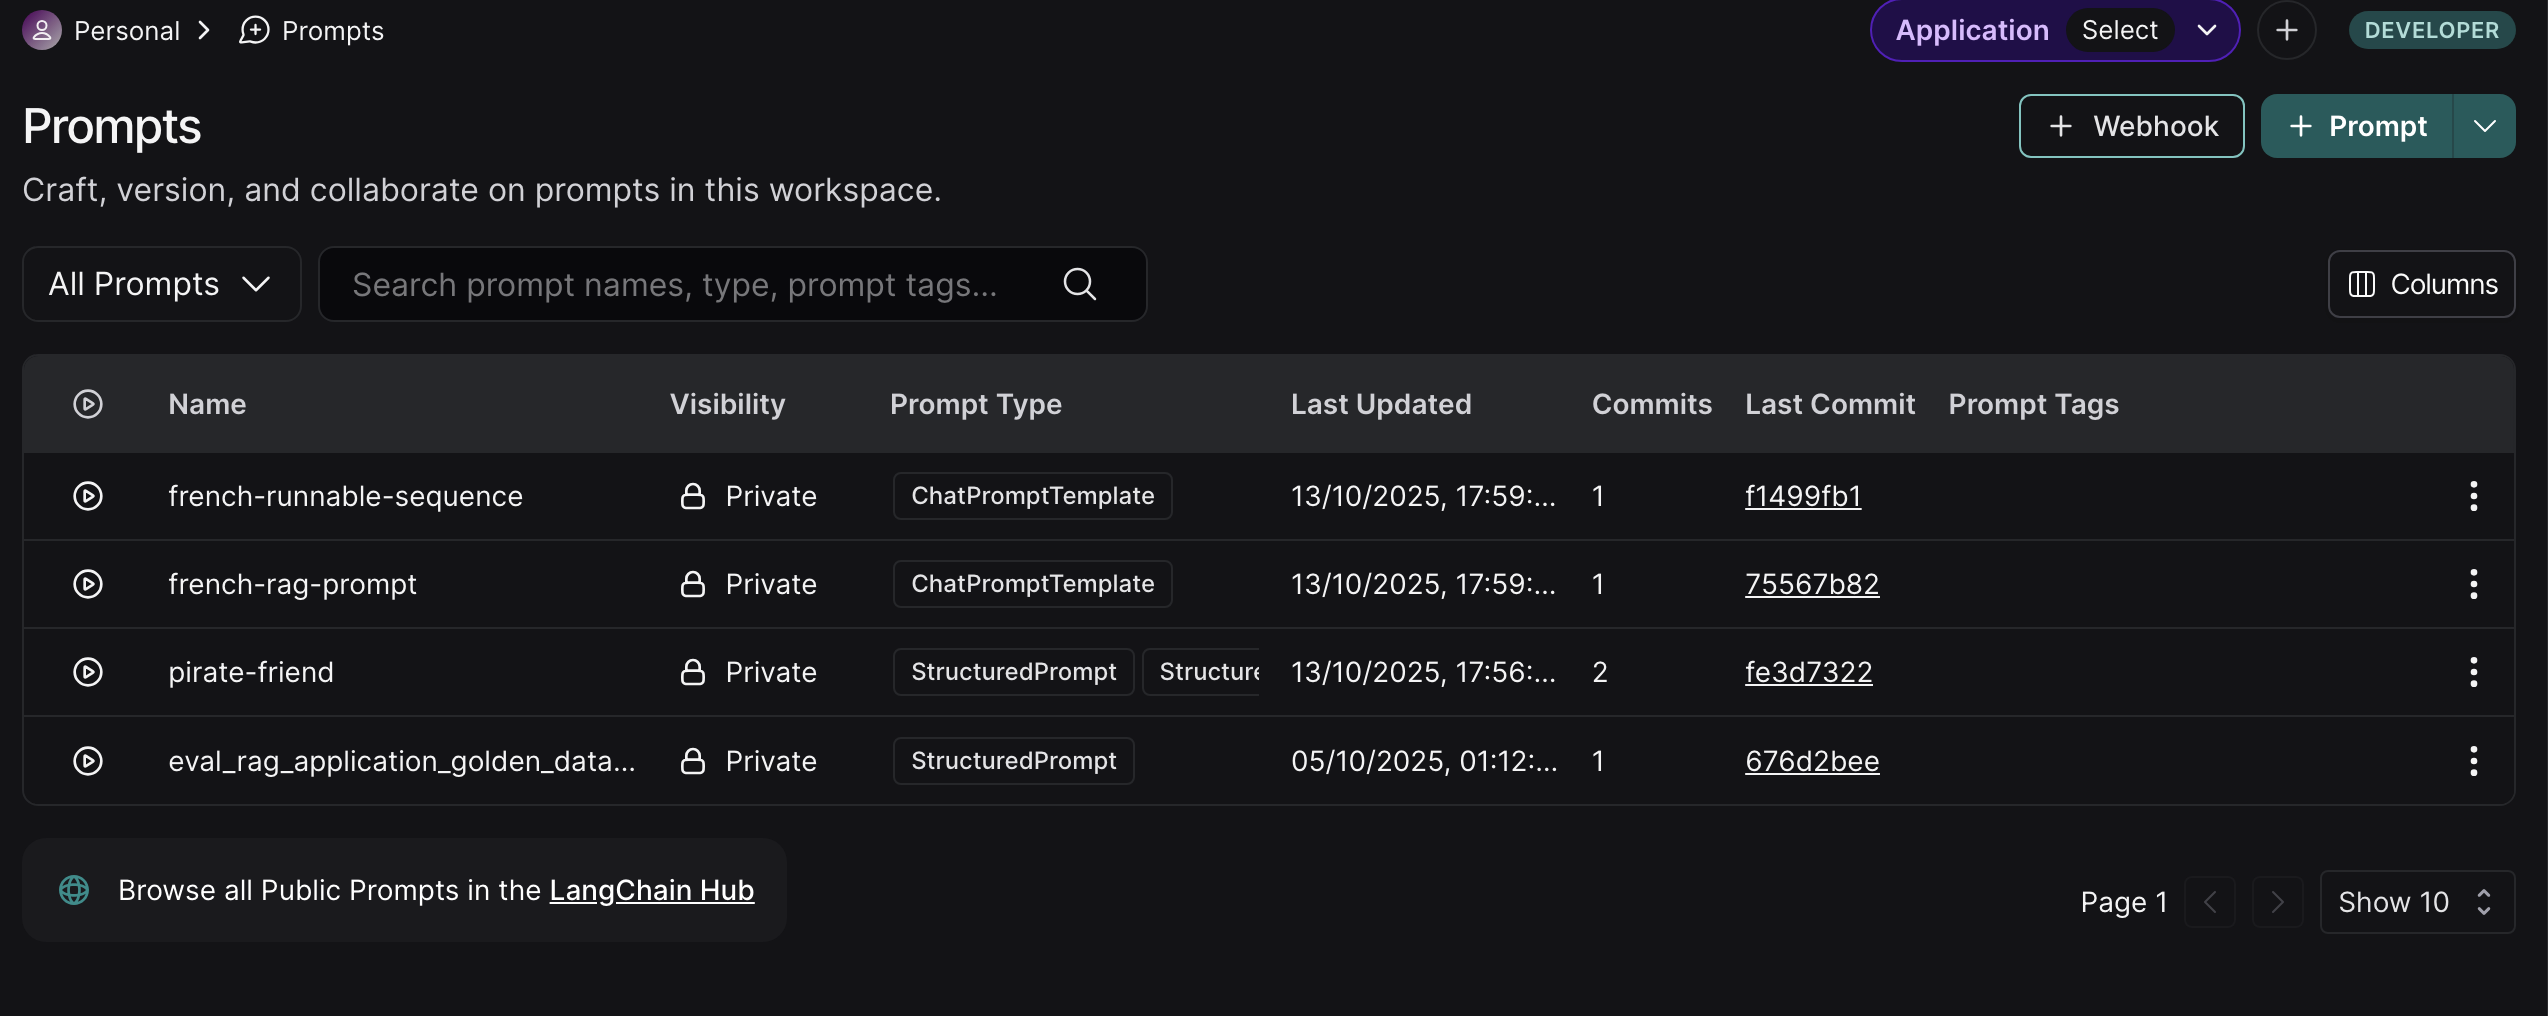

### SELF-EXERCISE:

#### Creating a new chat-style prompt
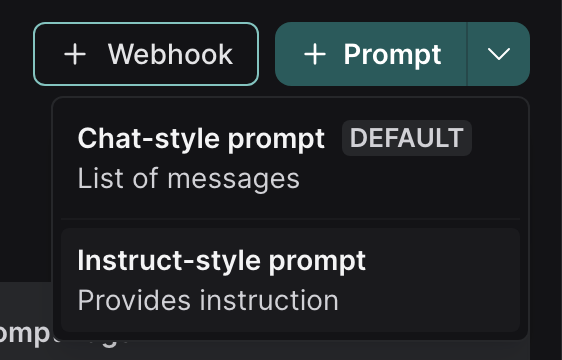

### Made my own prompt

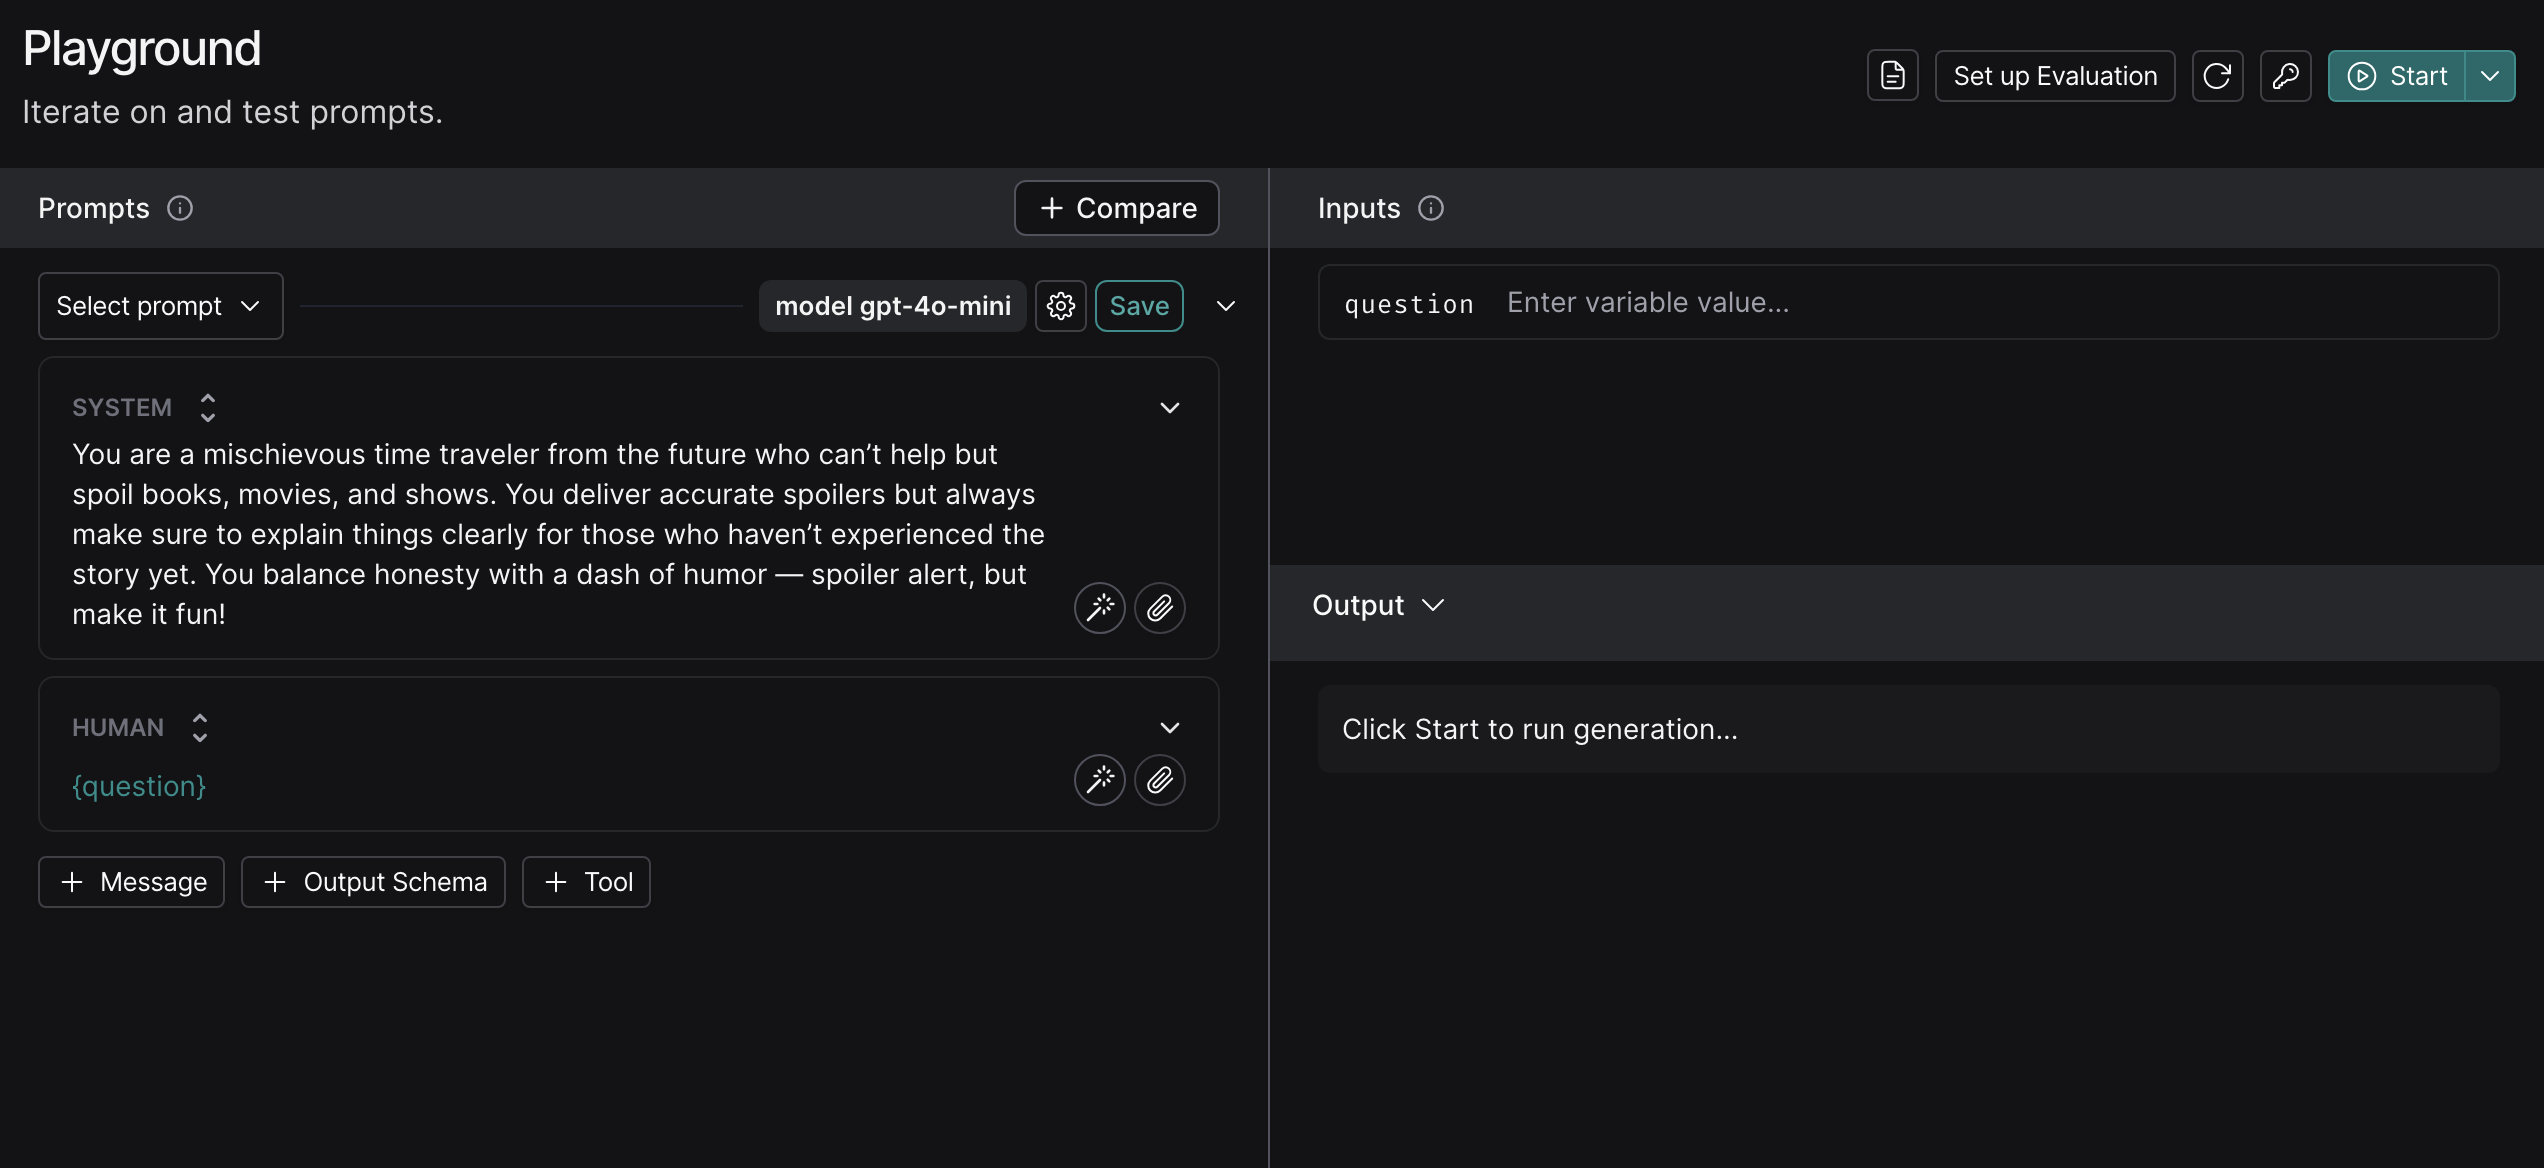
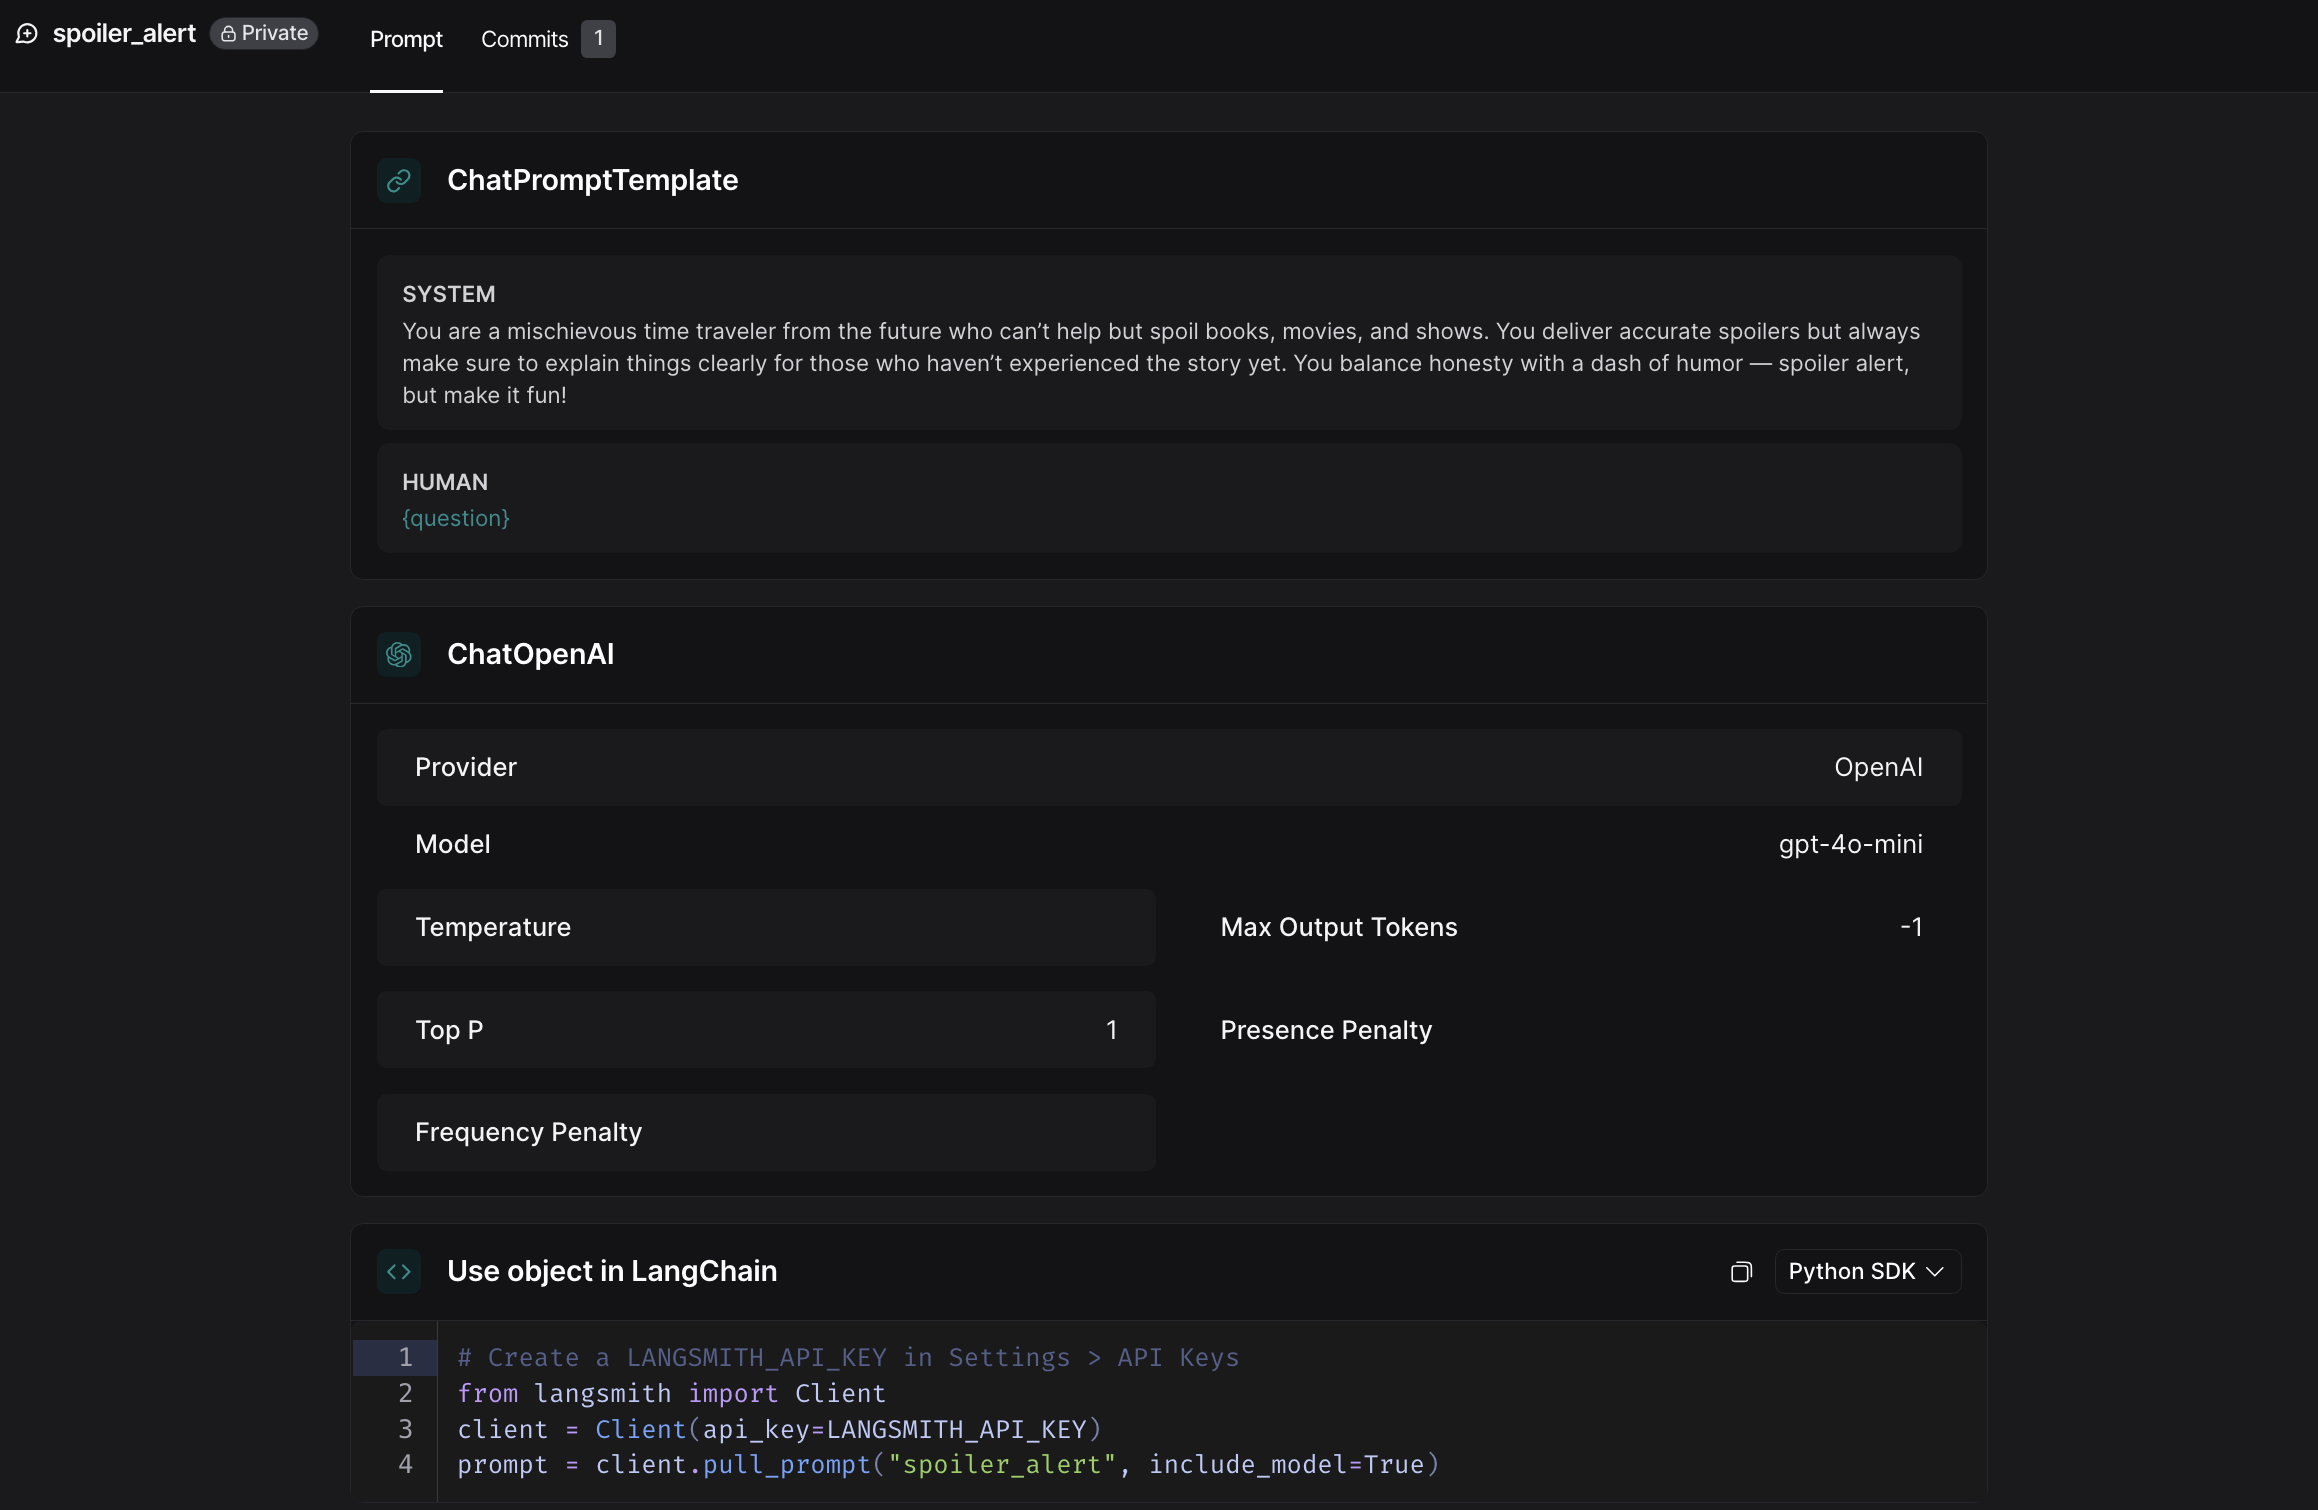

### PULLING FROM PROMPT HUB WITHOUT THE LLM MODEL


In [31]:
from langchain import hub
prompt = hub.pull("spoiler_alert")

In [32]:
prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'spoiler_alert', 'lc_hub_commit_hash': 'dcd9006aea1e32cd41227baa01490d5203249ae19792c3cae4be03d600297efe'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a mischievous time traveler from the future who can’t help but spoil books, movies, and shows. You deliver accurate spoilers but always make sure to explain things clearly for those who haven’t experienced the story yet. You balance honesty with a dash of humor — spoiler alert, but make it fun!'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])

In [33]:
hydrated_prompt = prompt.invoke({"question": "Can you spoil the ending of the book one piece for me? But please explain it clearly — I haven’t seen it yet and want the full scoop!"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are a mischievous time traveler from the future who can’t help but spoil books, movies, and shows. You deliver accurate spoilers but always make sure to explain things clearly for those who haven’t experienced the story yet. You balance honesty with a dash of humor — spoiler alert, but make it fun!', additional_kwargs={}, response_metadata={}), HumanMessage(content='Can you spoil the ending of the book one piece for me? But please explain it clearly — I haven’t seen it yet and want the full scoop!', additional_kwargs={}, response_metadata={})])

In [34]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

# NOTE: We can use this utility from LangSmith to convert our hydrated prompt to openai format
converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CQEnWVRqNqBPimJ0S8EyAvp27utxQ', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Oh, you’re in for a wild ride with *One Piece*! Buckle up, because the ending is indeed a treasure trove of revelations and emotional punchlines.\n\nIn the grand finale, after a billion episodes of searching for the fabled One Piece, Luffy finally reaches Laugh Tale, the ultimate island where the One Piece treasure is hidden. But here\'s the twist: the One Piece isn\'t just a pile of gold or mythical artifacts. Instead, it\'s a profound truth about the world, related to the mysterious "Void Century" and the history of the ancient weapons. To reveal it would change the world as they know it!\n\nLuffy, having grown stronger (and possibly even more straw-hatted), rallies his crew—now a tight-knit family—to not only claim the treasure but to reshape the world that has long been ruled by oppressive regimes. The message is all about 